# Dealing with class imbalance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## Load the dataset

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [4]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

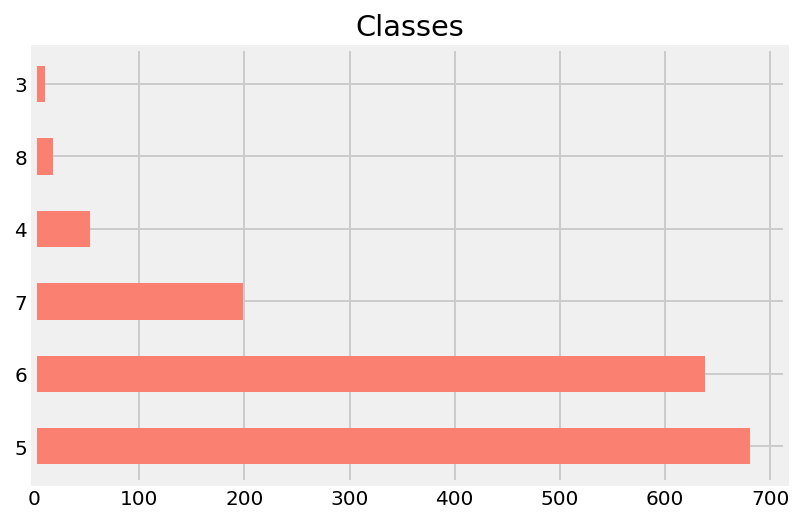

In [6]:
df.quality.value_counts().plot(kind='barh',title='Classes',color='salmon')

In [7]:
def sea_plot(X,Y,label='Classes'):
    sns.scatterplot(X['alcohol'],X['chlorides'], hue = Y['quality'], palette = c)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [8]:
def sea_plot1(X,Y,label='Classes'):
    sns.scatterplot(X['pH'],X['volatile acidity'], hue = Y['quality'], palette = c1)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [9]:
c = sns.color_palette('Set2',6)
c1 = sns.color_palette('cool',6)

In [10]:
X = df.iloc[:,0:11].copy()
Y = df.iloc[:,11:].copy()
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


## Resampling using [imbalanced learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html)



In [11]:
#conda install -c conda-forge imbalanced-learn

In [12]:
#!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

In [13]:
ran = RandomUnderSampler(random_state=1)
x_ran, y_ran = ran.fit_sample(X,Y)
y_ran.quality.value_counts()

8    10
7    10
6    10
5    10
4    10
3    10
Name: quality, dtype: int64

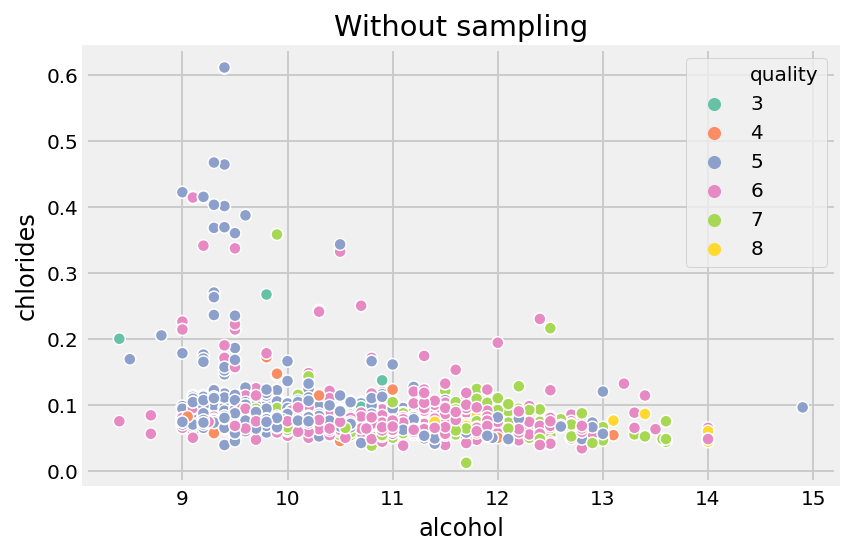

In [14]:
sea_plot(X,Y,'Without sampling')

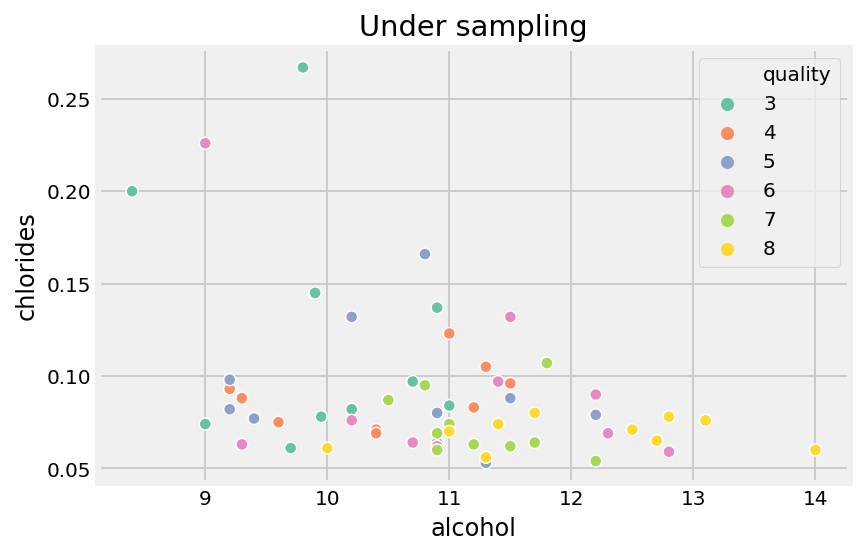

In [15]:
sea_plot(x_ran,y_ran,'Under sampling')

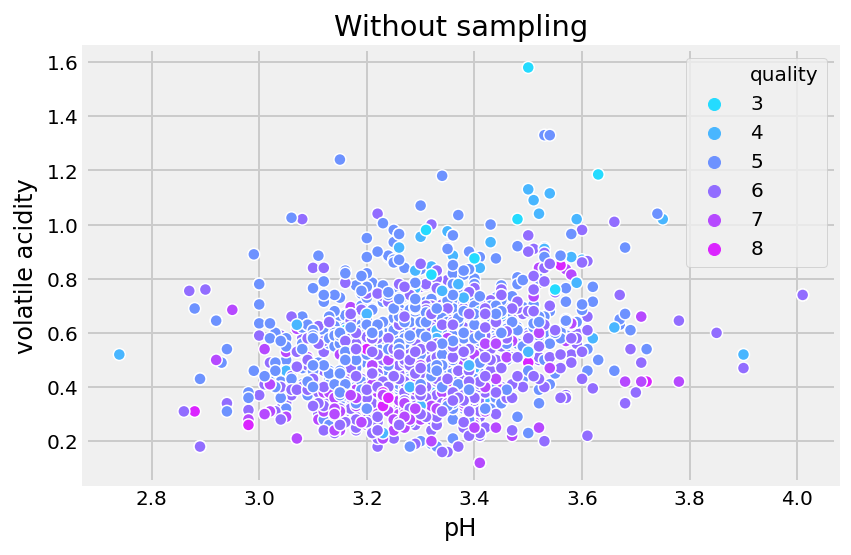

In [16]:
sea_plot1(X,Y,'Without sampling')

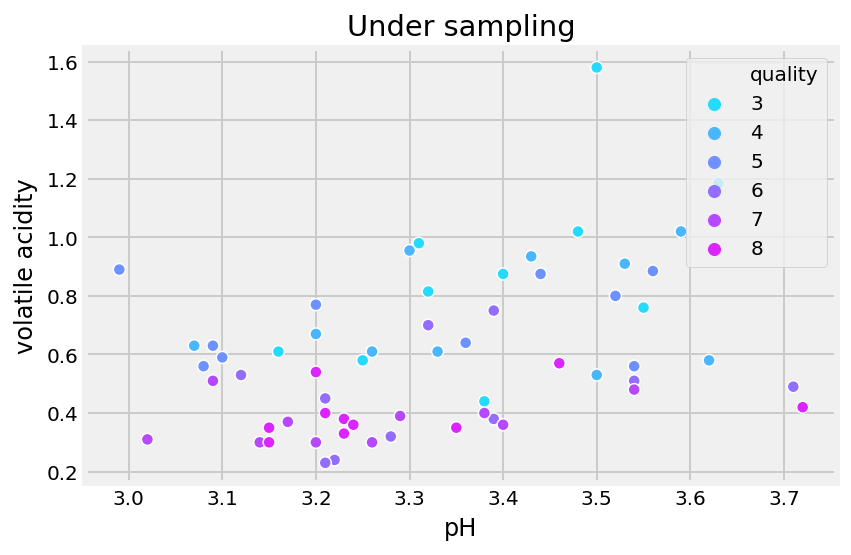

In [17]:
sea_plot1(x_ran,y_ran,'Under sampling')

In [18]:
from imblearn.under_sampling import TomekLinks

In [19]:
tm = TomekLinks(sampling_strategy='all')
x_tm, y_tm = tm.fit_sample(X,Y)
y_tm.quality.value_counts()

5    589
6    533
7    166
4     32
8     10
3      5
Name: quality, dtype: int64

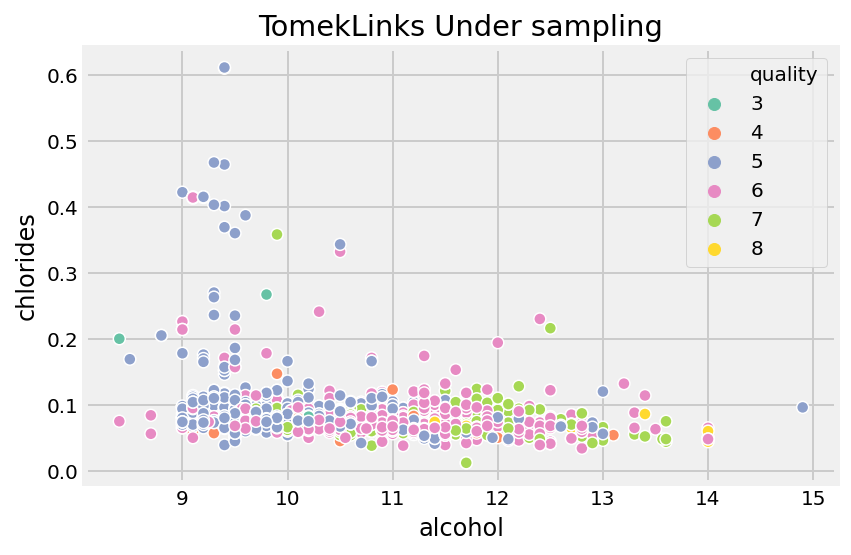

In [20]:
sea_plot(x_tm,y_tm,'TomekLinks Under sampling')

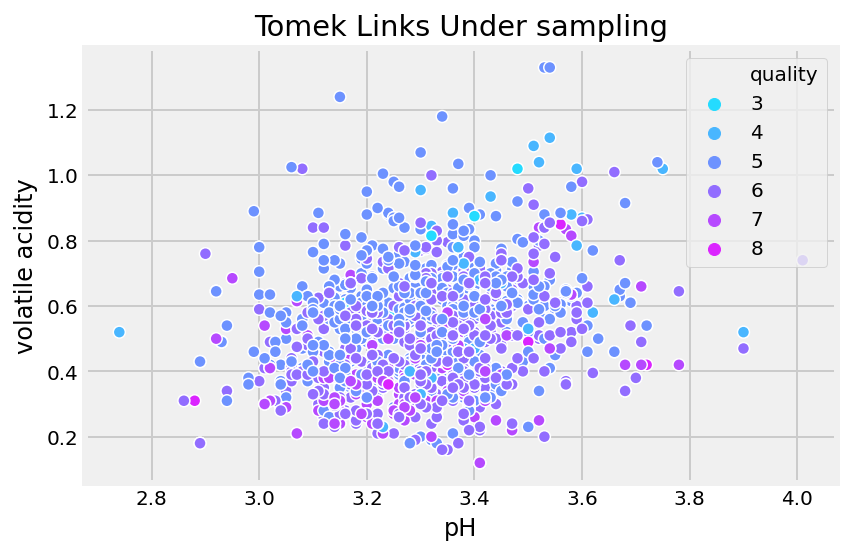

In [21]:
sea_plot1(x_tm,y_tm,'Tomek Links Under sampling')

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm, y_sm = sm.fit_sample(X,Y)
y_sm.quality.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

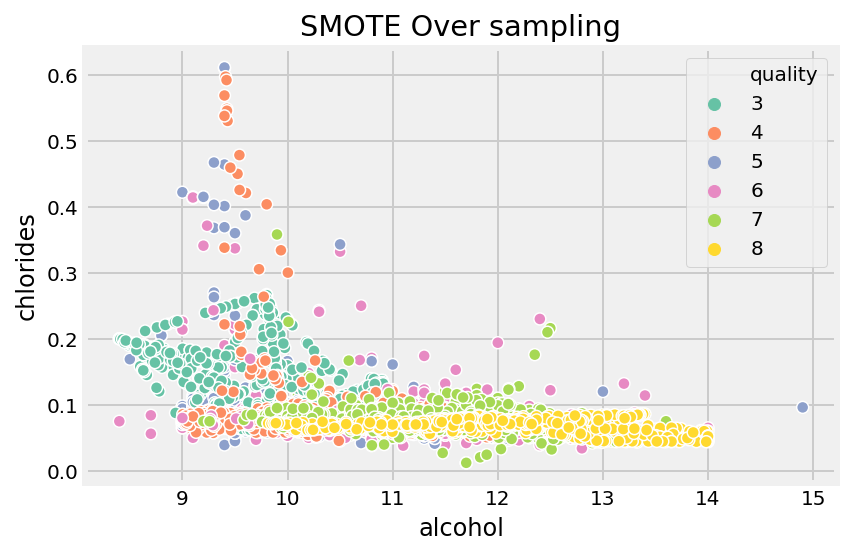

In [23]:
sea_plot(x_sm,y_sm,'SMOTE Over sampling')

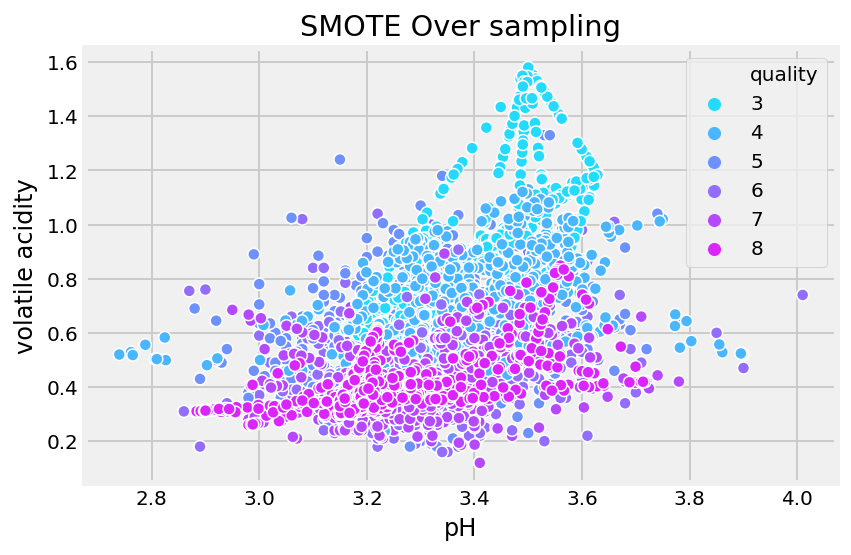

In [24]:
sea_plot1(x_sm,y_sm,'SMOTE Over sampling')

In [25]:
from imblearn.over_sampling import SVMSMOTE

svm = SVMSMOTE(sampling_strategy = 'not majority', k_neighbors = 4)
x_svm, y_svm = svm.fit_sample(X,Y)
y_svm.quality.value_counts()

7    681
5    681
6    681
8    452
4    351
3    347
Name: quality, dtype: int64

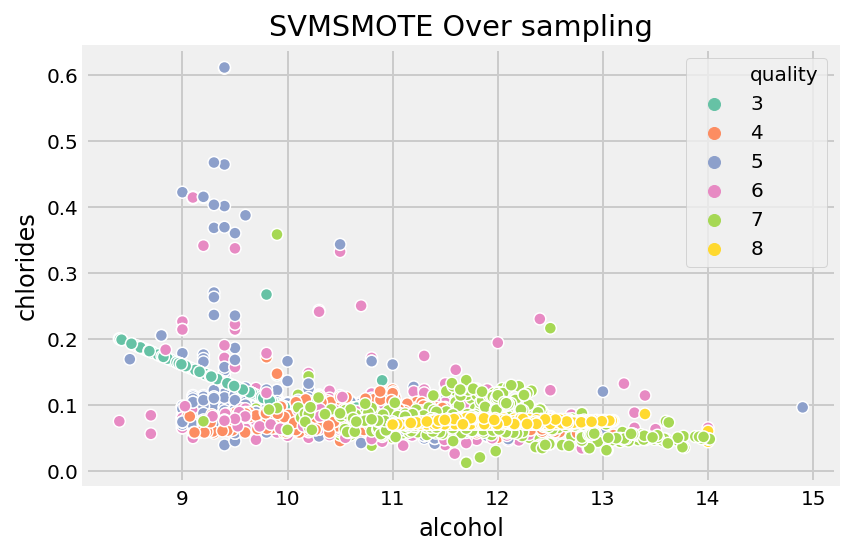

In [26]:
sea_plot(x_svm,y_svm,'SVMSMOTE Over sampling')

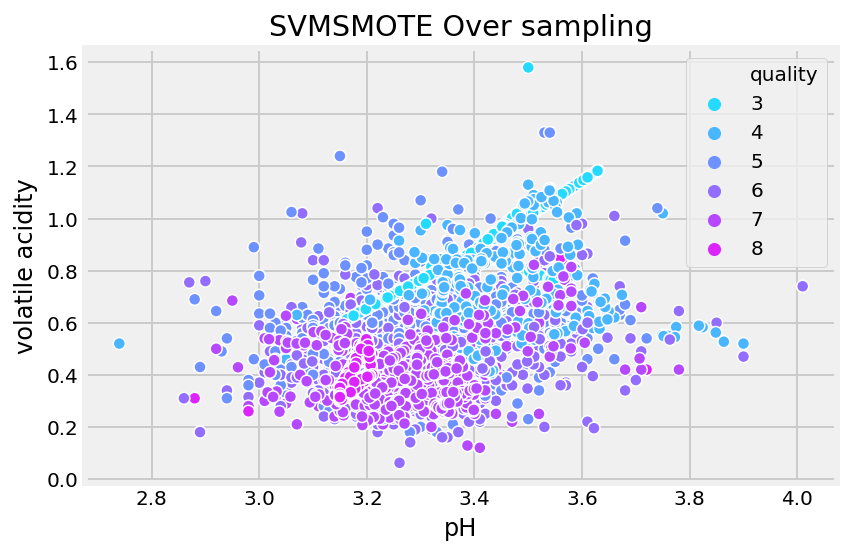

In [27]:
sea_plot1(x_svm,y_svm,'SVMSMOTE Over sampling')

In [28]:
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(sampling_strategy = 'all')
x_smtm, y_smtm = smtom.fit_sample(X,Y)
y_smtm.quality.value_counts()

3    673
8    671
7    663
4    660
5    617
6    612
Name: quality, dtype: int64

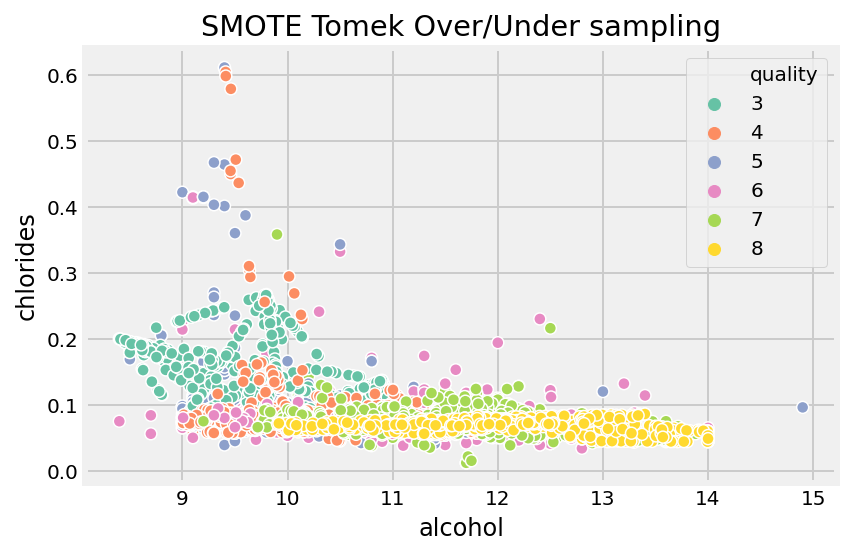

In [29]:
sea_plot(x_smtm,y_smtm,'SMOTE Tomek Over/Under sampling')

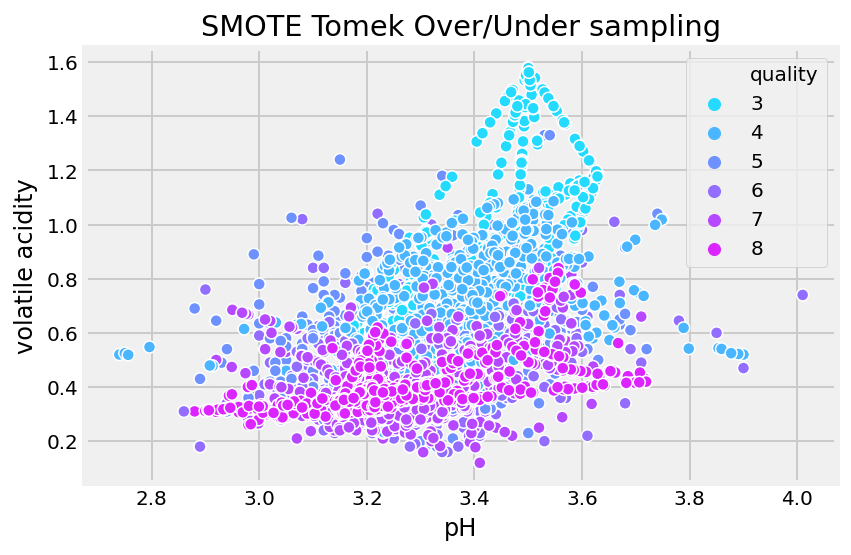

In [30]:
sea_plot1(x_smtm,y_smtm,'SMOTE Tomek Over/Under sampling')

In [31]:
from sklearn.model_selection import train_test_split
train_smx, test_smx,train_smy, test_smy = train_test_split(x_sm,y_sm,test_size=0.2)
train_svmx, test_svmx,train_svmy, test_svmy = train_test_split(x_svm,y_svm,test_size=0.2)
train_smtmx, test_smtmx,train_smtmy, test_smtmy = train_test_split(x_smtm,y_smtm,test_size=0.2)

In [32]:
train_smx.shape

(3268, 11)

In [33]:
train_svmx.shape

(2554, 11)

In [34]:
train_smtmx.shape

(3116, 11)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

In [36]:
rf = RandomForestClassifier()
rf.fit(train_smx,train_smy.values.ravel())
y_predsm = rf.predict(test_smx)

In [37]:
cmat_sm = cm(test_smy, y_predsm)
cmat_sm

array([[137,   0,   0,   0,   0,   0],
       [  0, 139,   5,   2,   0,   0],
       [  1,  11, 112,  21,   1,   0],
       [  2,   5,  29,  71,  17,   4],
       [  1,   0,   0,   5, 120,   2],
       [  0,   0,   0,   0,   4, 129]], dtype=int64)

In [38]:
rf1 = RandomForestClassifier()
rf1.fit(train_svmx,train_svmy.values.ravel())
y_predsvm = rf1.predict(test_svmx)

In [39]:
cmat_svm = cm(test_svmy, y_predsvm)
cmat_svm

array([[ 56,   0,   3,   0,   0,   0],
       [  1,  61,   1,   4,   0,   0],
       [  0,   2, 104,  23,   6,   0],
       [  0,   5,  32, 100,  19,   0],
       [  0,   0,   2,   8, 124,   0],
       [  0,   0,   0,   1,   2,  85]], dtype=int64)

In [40]:
rf2 = RandomForestClassifier()
rf2.fit(train_smtmx,train_smtmy.values.ravel())
y_predsmtm = rf2.predict(test_smtmx)

In [41]:
cmat_smtm = cm(test_smtmy, y_predsmtm)
cmat_smtm

array([[130,   0,   0,   0,   0,   0],
       [  0, 125,   3,   2,   1,   0],
       [  3,  12, 106,  25,   2,   0],
       [  1,   4,  22,  80,  11,   3],
       [  0,   1,   0,   4, 113,   4],
       [  0,   0,   0,   0,   1, 127]], dtype=int64)

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

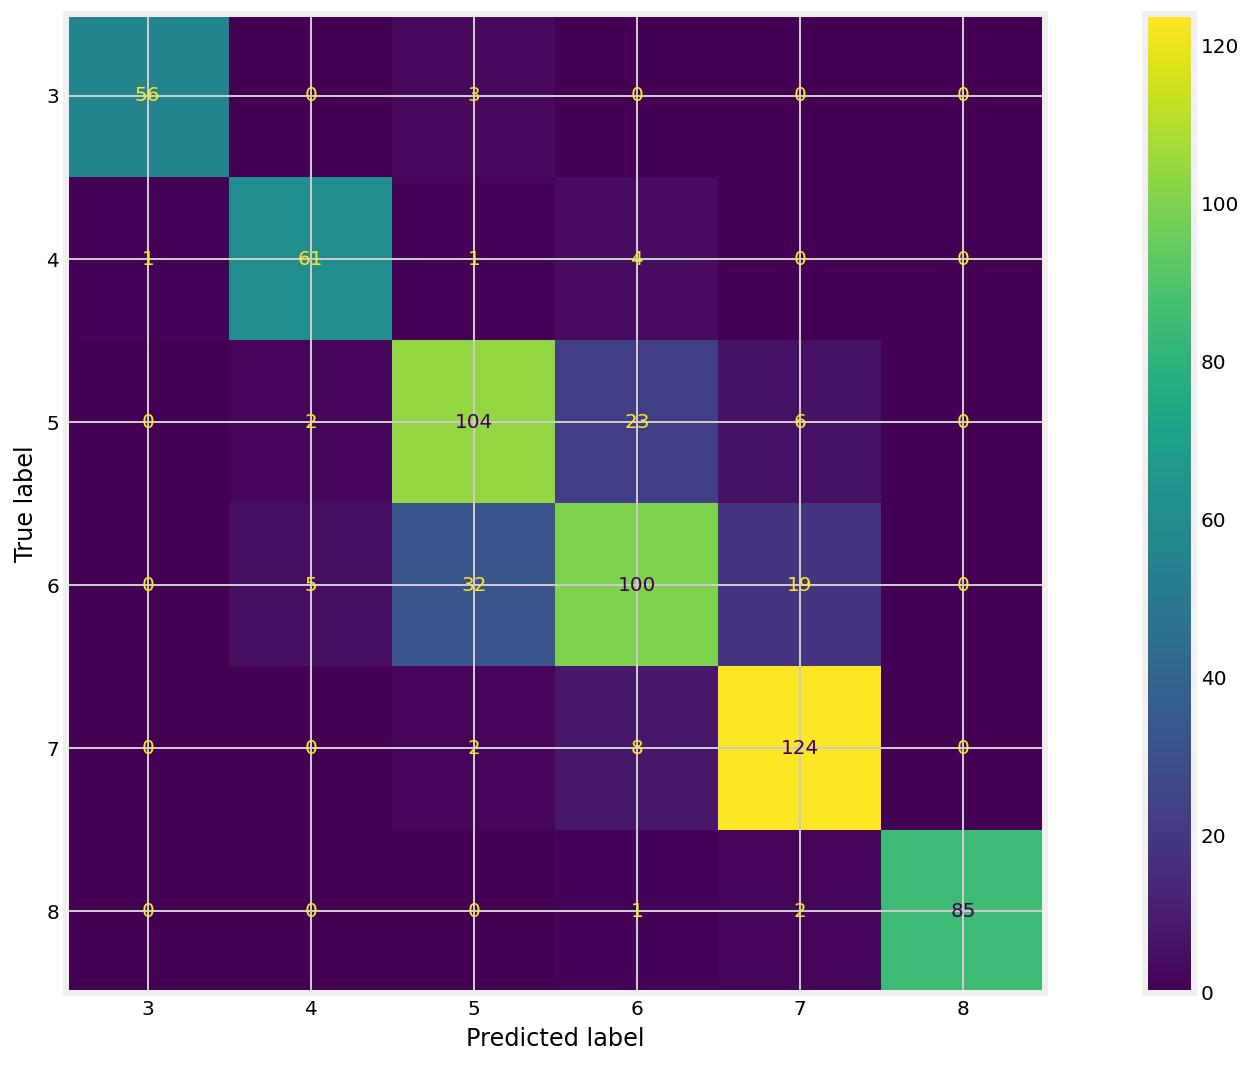

In [43]:
plt.rcParams['figure.figsize']= [16,9]
cmd = ConfusionMatrixDisplay(cmat_svm,display_labels = ['3','4','5','6','7','8'])
cmd.plot()

In [44]:
from yellowbrick.classifier import ClassificationReport

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


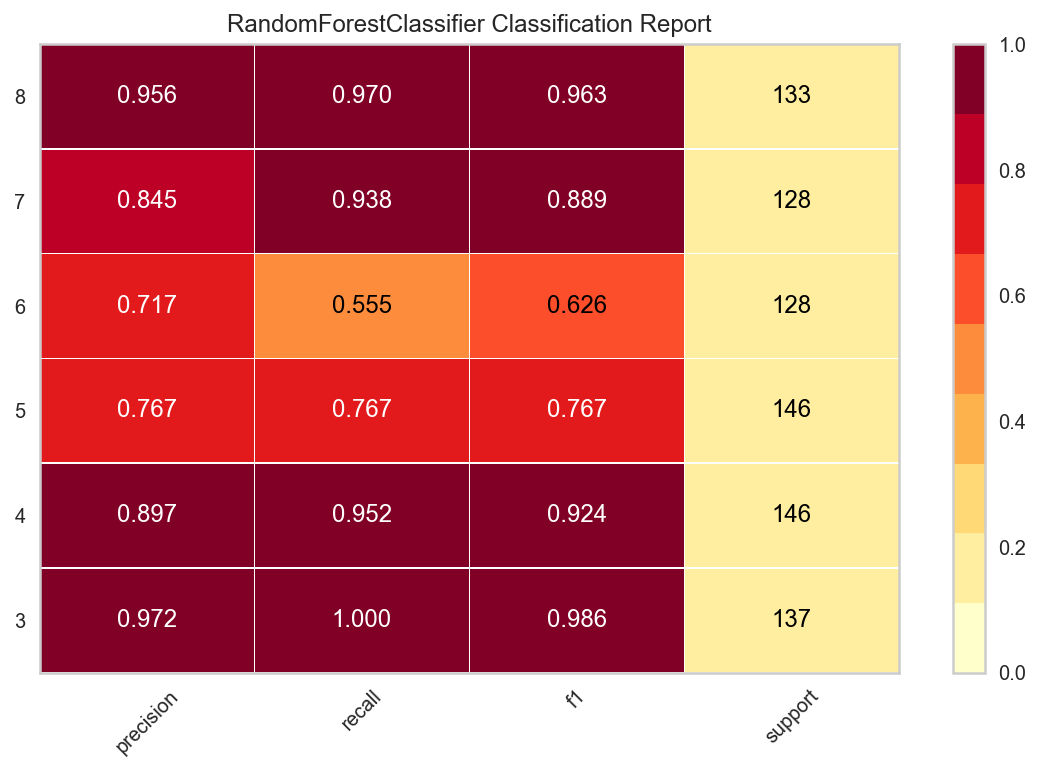

In [47]:
clr = ClassificationReport(rf,support=True)
clr.fit(train_smx, train_smy)
clr.score(test_smx, test_smy)
clr.show()

In [48]:
from sklearn.metrics import classification_report
cl1 = classification_report(test_smtmy, y_predsmtm, output_dict=True)
c_rep = pd.DataFrame(cl1).T
c_rep

,precision,recall,f1-score,support
3,0.970149,1.000000,0.984848,130.000000
4,0.880282,0.954198,0.915751,131.000000
5,0.809160,0.716216,0.759857,148.000000
6,0.720721,0.661157,0.689655,121.000000
7,0.882812,0.926230,0.904000,122.000000
8,0.947761,0.992188,0.969466,128.000000
accuracy,0.873077,0.873077,0.873077,0.873077
macro avg,0.868481,0.874998,0.870596,780.000000
weighted avg,0.868482,0.873077,0.869590,780.000000


In [49]:
c_rep1 = c_rep.copy()
c_rep1['support'] = c_rep1.support.apply(int)
c_rep1.style.background_gradient(cmap='viridis',subset=pd.IndexSlice['3':'8',:'recall'])

,precision,recall,f1-score,support
3,0.970149,1.000000,0.984848,130
4,0.880282,0.954198,0.915751,131
5,0.809160,0.716216,0.759857,148
6,0.720721,0.661157,0.689655,121
7,0.882812,0.926230,0.904000,122
8,0.947761,0.992188,0.969466,128
accuracy,0.873077,0.873077,0.873077,0
macro avg,0.868481,0.874998,0.870596,780
weighted avg,0.868482,0.873077,0.869590,780
